In [ ]:
from src.shape import ShapE

In [8]:
shape = ShapE()

In [9]:
res = shape('/Users/xpitfire/Downloads/cat_image.jpeg')

  0%|          | 0/1 [00:00<?, ?it/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


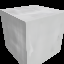

In [14]:
res[2]

In [1]:
from src.func import RewardModel

In [2]:
validator = RewardModel(metric='cosine', aggregation='mean')

In [3]:
import numpy as np

refs_texts = ['orange cat',
              'cat lying in bed',
              'cute kitten',
              'a cat from the front',
              'other']

res_clip = validator.clip(['assets/img/cat.jpeg',
                           'assets/img/steam_deck.jpg',
                           'assets/img/dog.jpeg'],
                          refs_texts)

res_clip = np.array(res_clip)

In [4]:
res_clip

array([[9.33048069e-01, 9.41380858e-03, 1.52694555e-02, 4.19678465e-02,
        3.00800020e-04],
       [1.42061962e-02, 2.84630107e-04, 1.51117845e-03, 1.09769646e-02,
        9.73021030e-01],
       [3.79682362e-01, 1.32316619e-03, 3.50327283e-01, 1.00345753e-01,
        1.68321460e-01]], dtype=float32)

In [5]:
index = res_clip.argmax(axis=1)
index

array([0, 4, 0])

In [6]:
max_values = res_clip.max(axis=1)
max_values

array([0.93304807, 0.97302103, 0.37968236], dtype=float32)

In [7]:
max_values[index == 4] = 0
max_values

array([0.93304807, 0.        , 0.37968236], dtype=float32)

In [8]:
res_emb = validator.embed('cat lying in bed')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
res_emb[:20]

array([ 0.01101512, -0.05043096,  0.0021199 , -0.01135311,  0.02731842,
        0.01787838, -0.01554478,  0.02341875, -0.01139169, -0.00331545,
        0.06354364,  0.01190767, -0.04303485, -0.02473567, -0.01814181,
        0.13683559,  0.01111524,  0.05122072,  0.04004744, -0.04699291],
      dtype=float32)

In [10]:
import os
path = "assets/references"
ext  = ".jpg"
refs_imgs = []
for file in os.listdir(path):
    if file.endswith(ext):
        refs_imgs.append(os.path.join(path, file))

In [11]:
scores = validator(images=['assets/img/cat.jpeg',
                           'assets/img/steam_deck.jpg',
                           'assets/img/dog.jpeg'],
                   refs_images=refs_imgs,
                   refs_texts=refs_texts)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
scores._metadata.sym1

<class symai.symbol.Symbol at 0x178c9d4d0>(value=[[0.38619676 0.27239844 0.3414048 ]])

In [19]:
scores._metadata.sym2

<class symai.symbol.clip at 0x178c9d510>(value=[[9.33048069e-01 9.41380858e-03 1.52694555e-02 4.19678465e-02
  3.00800020e-04]
 [1.42061962e-02 2.84630107e-04 1.51117845e-03 1.09769646e-02
  9.73021030e-01]
 [3.79682362e-01 1.32316619e-03 3.50327283e-01 1.00345753e-01
  1.68321460e-01]])

In [14]:
scores

<class symai.symbol.Symbol at 0x175cf08d0>(value=[0.52607581 0.18467526 0.28924893])

In [15]:
scores.value.sum()

1.0000000000000002